In [1]:
#  Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/store-sales/Stores.csv')

In [3]:
print(df.info())
print(df.describe())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB
None
        Store ID    Store_Area  Items_Available  Daily_Customer_Count  \
count  896.000000   896.000000       896.000000            896.000000   
mean   448.500000  1485.409598      1782.035714            786.350446   
std    258.797218   250.237011       299.872053            265.389281   
min      1.000000   775.000000       932.000000             10.000000   
25%    224.750000  1316.750000      1575.500000            600.000000   
50%    448.500000  1477.000000      1773.500000            780.000000  

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())

# Drop duplicate rows if any
df_cleaned = df.drop_duplicates()

# Show the shape before and after cleaning
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

# Optional: Reset index after cleaning
df_cleaned.reset_index(drop=True, inplace=True)


Missing Values:
 Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64
Duplicate Rows: 0
Original shape: (896, 5)
Cleaned shape: (896, 5)


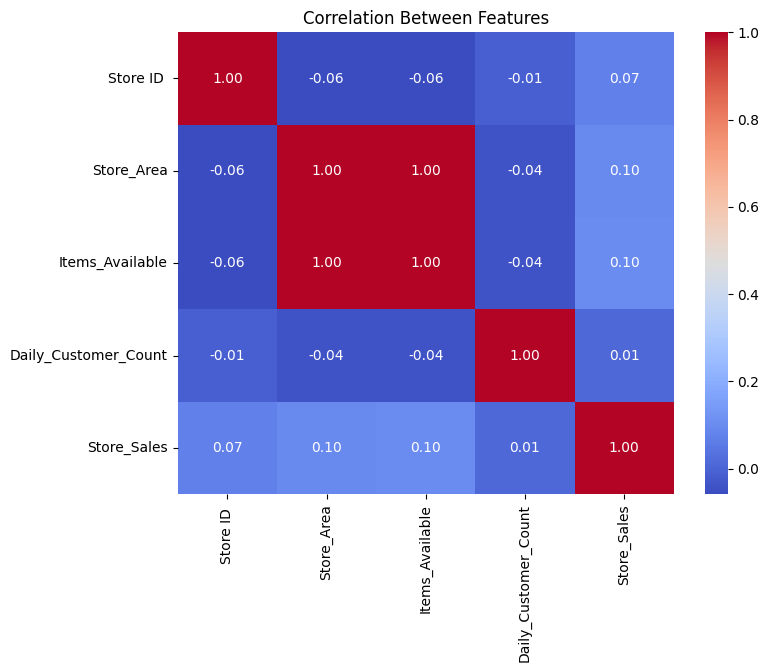

In [5]:
# 📊 Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Features")
plt.show()

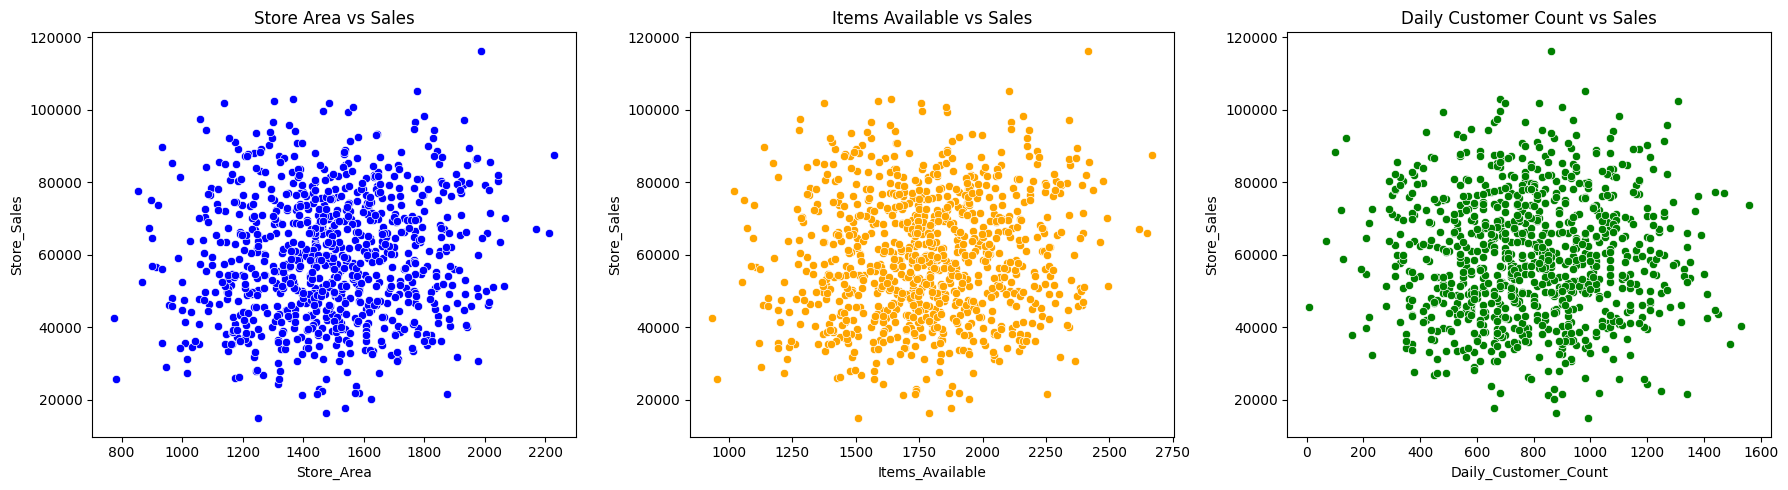

In [8]:
# 📈 Scatter Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=df, x="Store_Area", y="Store_Sales", ax=axes[0], color='blue')
axes[0].set_title("Store Area vs Sales")
sns.scatterplot(data=df, x="Items_Available", y="Store_Sales", ax=axes[1], color='orange')
axes[1].set_title("Items Available vs Sales")

sns.scatterplot(data=df, x="Daily_Customer_Count", y="Store_Sales", ax=axes[2], color='green')
axes[2].set_title("Daily Customer Count vs Sales")

plt.tight_layout()
plt.show()

In [9]:
# 📦 Feature Engineering (Optional)
df['Sales_per_sqft'] = df['Store_Sales'] / df['Store_Area']
df['Items_per_customer'] = df['Items_Available'] / df['Daily_Customer_Count']

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


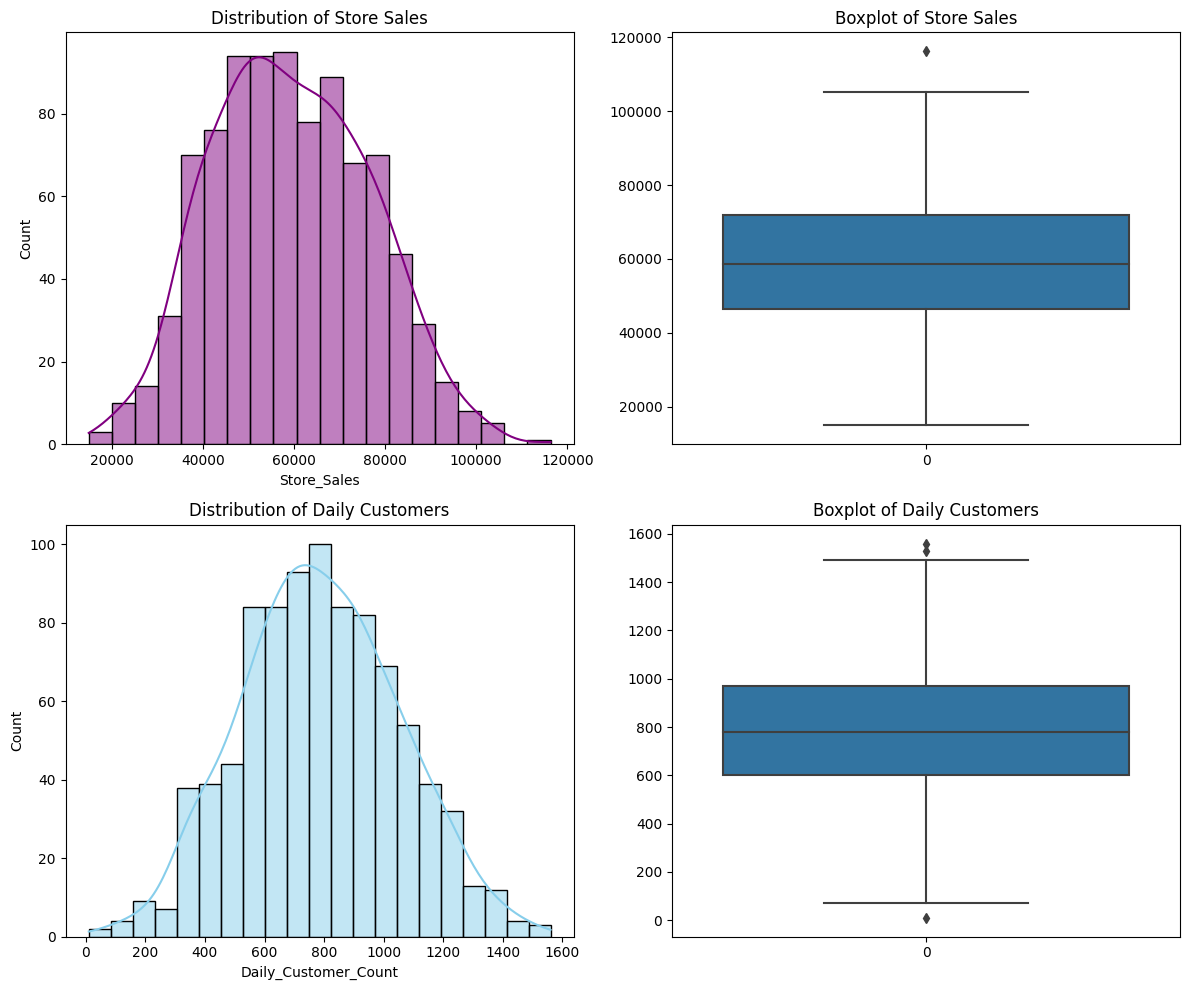

In [10]:
# 📉 Histogram and Boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['Store_Sales'], kde=True, ax=axes[0,0], color='purple')
axes[0,0].set_title("Distribution of Store Sales")

sns.boxplot(df['Store_Sales'], ax=axes[0,1])
axes[0,1].set_title("Boxplot of Store Sales")

sns.histplot(df['Daily_Customer_Count'], kde=True, ax=axes[1,0], color='skyblue')
axes[1,0].set_title("Distribution of Daily Customers")

sns.boxplot(df['Daily_Customer_Count'], ax=axes[1,1])
axes[1,1].set_title("Boxplot of Daily Customers")

plt.tight_layout()
plt.show()


In [11]:
# 🧠 Prepare features and target
features = ['Store_Area', 'Items_Available', 'Daily_Customer_Count']
X = df[features]
y = df['Store_Sales']

In [12]:
# 📤 Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 🧪 Model Training (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [14]:
# 🔍 Prediction and Evaluation
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: -0.19091520720782595
MAE: 14312.299444444447
RMSE: 17999.61058832323


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


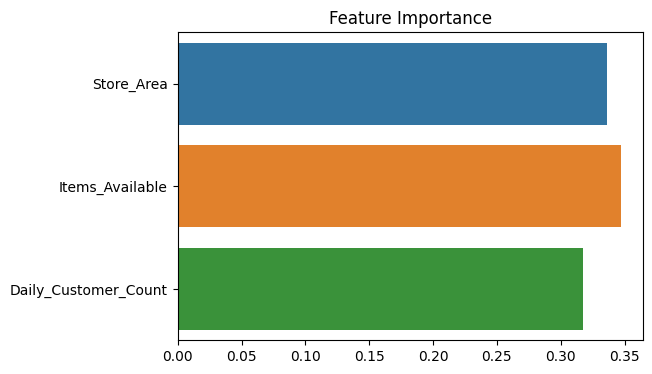

In [15]:
# 📌 Feature Importance
importances = model.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


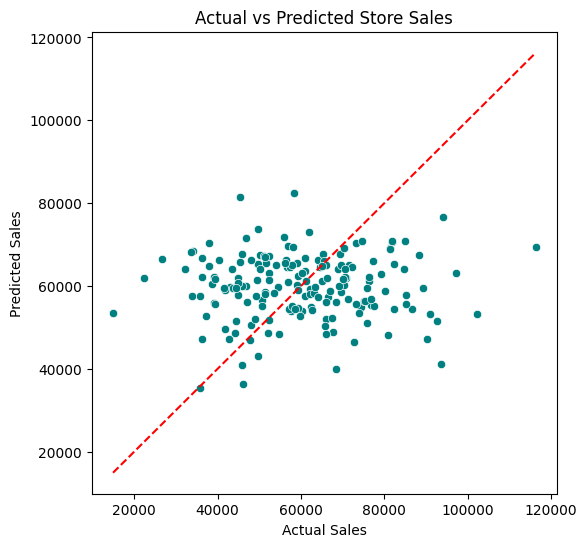

In [16]:
# 📈 Predicted vs Actual
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color="teal")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Store Sales")
plt.show()
